# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | diapaga
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | shakiso
Processing Record 7 of Set 1 | pavlodar
Processing Record 8 of Set 1 | grand river south east
Processing Record 9 of Set 1 | lovozero
City not found. Skipping...
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | inta
Processing Record 14 of Set 1 | busselton
City not found. Skipping...
Processing Record 15 of Set 1 | san diego de la union
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | asau
Processing Record 20 of Set 1 | itarema
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | dalvik
Processing Record 23 of Set 1 

Processing Record 40 of Set 4 | hami
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | saint-georges
Processing Record 44 of Set 4 | swan hill
Processing Record 45 of Set 4 | beroroha
Processing Record 46 of Set 4 | tautira
Processing Record 47 of Set 4 | vostok
Processing Record 48 of Set 4 | port elizabeth
Processing Record 49 of Set 4 | pudozh
Processing Record 1 of Set 5 | inhambane
Processing Record 2 of Set 5 | ixtapa
Processing Record 3 of Set 5 | gorin
Processing Record 4 of Set 5 | gornopravdinsk
Processing Record 5 of Set 5 | dikson
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | narsaq
City not found. Skipping...
Processing Record 8 of Set 5 | kibala
Processing Record 9 of Set 5 | bilma
Processing Record 10 of Set 5 | komsomolskiy
City not found. Skipping...
Processing Record 11 of Set 5 | enid
Processing Record 12 of Set 5 | severo-kurilsk
Processing Record 13 of Set 5 | tarakan
Processing R

Processing Record 33 of Set 8 | lat yao
Processing Record 34 of Set 8 | northfield
Processing Record 35 of Set 8 | sibolga
Processing Record 36 of Set 8 | anadyr
Processing Record 37 of Set 8 | vozhega
Processing Record 38 of Set 8 | antofagasta
Processing Record 39 of Set 8 | alihe
City not found. Skipping...
Processing Record 40 of Set 8 | avigliana
Processing Record 41 of Set 8 | broome
Processing Record 42 of Set 8 | turukhansk
Processing Record 43 of Set 8 | staraya poltavka
Processing Record 44 of Set 8 | taybad
Processing Record 45 of Set 8 | eyl
Processing Record 46 of Set 8 | banjar
Processing Record 47 of Set 8 | mandya
Processing Record 48 of Set 8 | meulaboh
Processing Record 49 of Set 8 | porto novo
City not found. Skipping...
Processing Record 1 of Set 9 | mangrol
Processing Record 2 of Set 9 | esso
Processing Record 3 of Set 9 | egvekinot
Processing Record 4 of Set 9 | tomatlan
Processing Record 5 of Set 9 | moengo
Processing Record 6 of Set 9 | sovetskaya gavan
Processi

Processing Record 17 of Set 12 | raudeberg
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dict

{'City': ['barrow',
  'rikitea',
  'diapaga',
  'hobart',
  'puerto ayora',
  'shakiso',
  'pavlodar',
  'grand river south east',
  'lovozero',
  'port alfred',
  'sitka',
  'avarua',
  'inta',
  'busselton',
  'san diego de la union',
  'nanortalik',
  'butaritari',
  'leningradskiy',
  'asau',
  'itarema',
  'cherskiy',
  'dalvik',
  'roseburg',
  'atuona',
  'jamestown',
  'punta arenas',
  'laguna',
  'kavieng',
  'tasiilaq',
  'khatanga',
  'ballina',
  'bluff',
  'mokhsogollokh',
  'carnarvon',
  'kahului',
  'tshikapa',
  'hermanus',
  'bengkulu',
  'cape town',
  'auki',
  'nikolskoye',
  'ponta do sol',
  'san patricio',
  'pinawa',
  'palauig',
  'teguldet',
  'bredasdorp',
  'vaini',
  'new norfolk',
  'nouakchott',
  'khandyga',
  'houma',
  'esperance',
  'upernavik',
  'alofi',
  'yellowknife',
  'port keats',
  'namibe',
  'ferrol',
  'ushuaia',
  'east london',
  'cidreira',
  'bilibino',
  'tazmalt',
  'presidente medici',
  'nemuro',
  'albany',
  'georgetown',
  'mo

In [5]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,40,US,1579925355,75,71.29,-156.79,-20.20,9.17
1,rikitea,43,PF,1579925180,76,-23.12,-134.97,78.58,13.42
2,diapaga,58,BF,1579925356,9,12.07,1.79,69.84,9.71
3,hobart,75,AU,1579925162,38,-42.88,147.33,75.20,16.11
4,puerto ayora,75,ES,1579925356,100,36.59,-6.23,55.40,6.93


In [7]:
weather_dataframe.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [8]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,40,US,1579925355,75,71.29,-156.79,-20.20,9.17
1,rikitea,43,PF,1579925180,76,-23.12,-134.97,78.58,13.42
2,diapaga,58,BF,1579925356,9,12.07,1.79,69.84,9.71
3,hobart,75,AU,1579925162,38,-42.88,147.33,75.20,16.11
4,puerto ayora,75,ES,1579925356,100,36.59,-6.23,55.40,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [9]:
time.strftime('%x')

'01/24/20'

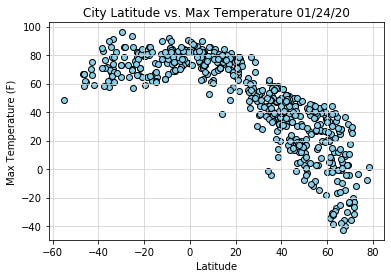

In [10]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

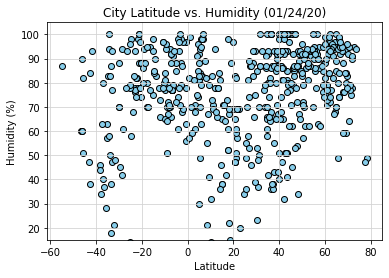

In [11]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

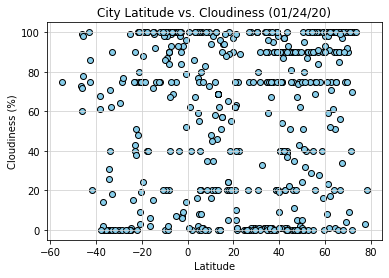

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%x') )               
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

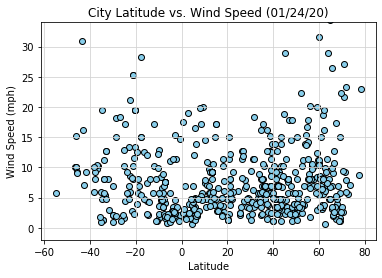

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%x') )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [14]:
#Define x and y values
x_values = weather_dataframe['Lat']
y_values = weather_dataframe['Max Temp']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      11.848849
1      84.581757
2      57.471588
3      99.804745
4      38.581525
         ...    
551    38.581525
552    73.149109
553    61.654828
554    65.999851
555    19.013514
Name: Lat, Length: 556, dtype: float64


In [15]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.77x +66.77


The r-squared is: -0.7994969690401614


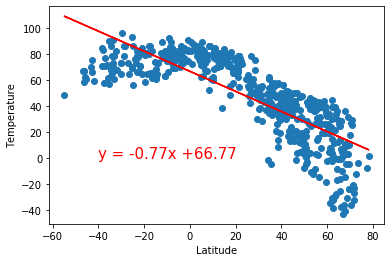

In [16]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-40,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
south_df = weather_dataframe[weather_dataframe["Lat"] < 0]    
north_df = weather_dataframe[weather_dataframe["Lat"] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -1.29


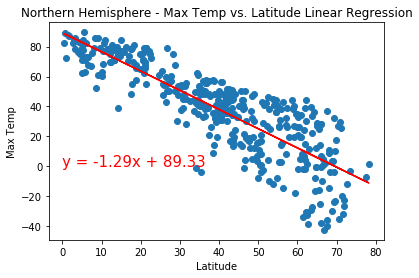

In [18]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Max Temp'])
# Call an function #2
annotate(equation, 0, 0)
# Set a title
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Max Temp')
# Save the figure
plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.26


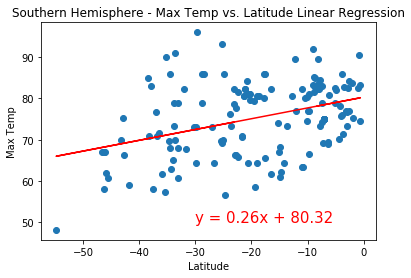

In [20]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Max Temp'])
# Call an function #2
annotate(equation, -30, 50)
# Set a title
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Max Temp')
# Save the figure
plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.46


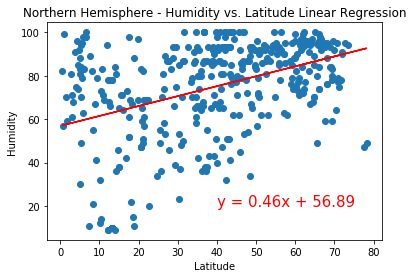

In [23]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Humidity'])
# Call an function #2
annotate(equation, 40, 20)
# Set a title
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.51


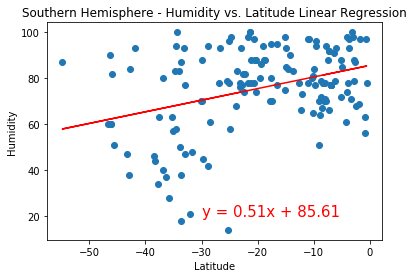

In [25]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Humidity'])
# Call an function #2
annotate(equation,-30, 20)
# Set a title
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Southern Hemisphere - Humidity vs. Latitude Linear Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.46


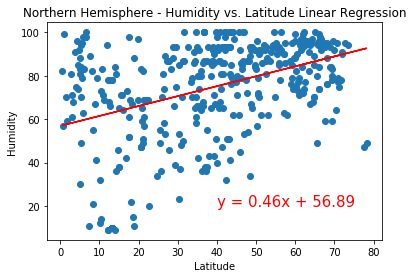

In [26]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Humidity'])
# Call an function #2
annotate(equation, 40, 20)
# Set a title
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Humidity')
# Save the figure
plt.savefig('Northern Hemisphere - Humidity vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 1.07


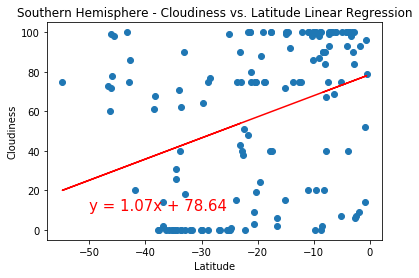

In [28]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Cloudiness'])
# Call an function #2
annotate(equation,-50, 10)
# Set a title
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Cloudiness')
# Save the figure
plt.savefig('Southern Hemisphere - Cloudiness vs. Lattude Linear Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07


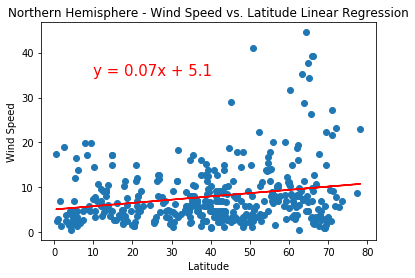

In [29]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(north_df['Lat'], north_df['Wind Speed'])
# Call an function #2
annotate(equation,10, 35)
# Set a title
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.12


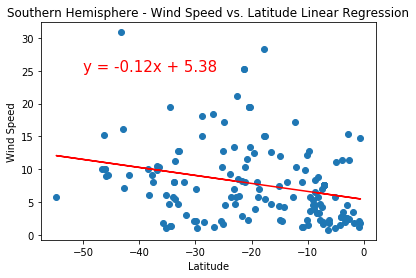

In [31]:
def linear_agression(x,y):
    print(f'The r-squared is : {round(linregress(x, y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,'r-')
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color='red')



# Call an function #1
equation = linear_agression(south_df['Lat'], south_df['Wind Speed'])
# Call an function #2
annotate(equation, -50, 25)
# Set a title
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
# Set xlabel
plt.xlabel('Latitude')
# Set ylabel
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png')